# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [75]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2022-02-05 11:16:59--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.3’

test.dat.3          100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-02-05 11:16:59 (385 MB/s) - ‘test.dat.3’ saved [2844/2844]

--2022-02-05 11:16:59--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.3’

train.dat.3         100%[===================>]  10.98K  --.-KB/s    in 0s      

2022-02-05 11:16:59 (68.6 MB/s) - ‘train.dat.3’ saved [11244/11244]



In [169]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    next(f)
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        w0 = 0
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum(i[0] * i[1] for i in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return (1 if output(weights, instance) >= 0.5 else 0)


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #Weight Initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #Weighted Sum
            in_value = dot_product(weights, instance)
            #Activation Function
            output = sigmoid(in_value)
            #Performance Measure
            error = instance[-1] - output #error = real - predicted
            #Weight Training
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
**Answer:** We want to calculate error on the sigmoid value of the weighted inputs, as opposed to the output of the activation function (either 1 or 0). 



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

size_list = []
accuracy_list = []
lr_list = []
epoch_list = []

tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_array = [0.005, 0.01, 0.05]

In [6]:
for rate in lr_array:
    for percent in tr_percent:
        for epoch in num_epochs:
            size = round(len(instances_tr) * percent / 100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, rate, epoch)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#train: {len(pre_instances):1}, epochs: {epoch:3}, learning rate: {rate:.3f}; "
                     f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
            
            size_list.append(size)
            accuracy_list.append(accuracy)
            lr_list.append(rate)
            epoch_list.append(epoch)

#train: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#train: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instanc

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

In most cases where we observe high accuracy, 50-100% of the training dataset is used. When the number of training instances is held constant, more epochs generally yields a better accuracy, but not always. A learning rate of 0.005 is shown to converge very slowly across all numbers of training instances, and not at all where the number of epochs is low. A learning rate of 0.010 steadily converges with low- and high-volume data and a high number of epochs. Setting learning rate to 0.050 quickly obtains high accuracy on both low- and high-volume data but tends to drop off with more epochs, perhaps due to an overstepping along the gradient. A larger number of epochs positively affects accuracy when using a lower learning rate because it gives the perceptron more opportunities to recognize patterns and thus learn. The biggest factor to attaining high accuracy, however, is the quantity of data. With a learning rate from 0.01-0.05, an accuracy of 80.0 can be achieved in relatively few epochs. Even with a learning rate of 0.05, a significantly improved score is achieved after 100 epochs. 

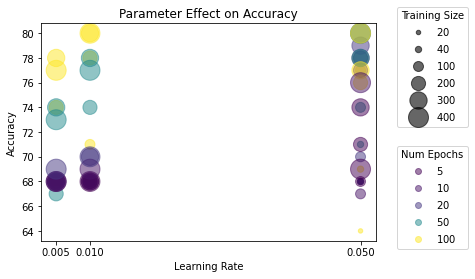

Average accuracy: 70.77777777777777


In [11]:
fig, ax = plt.subplots()

scatter = ax.scatter(lr_list, accuracy_list, alpha=0.5, s=size_list, c=epoch_list)

plt.title('Parameter Effect on Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks([0.005, 0.010, 0.050], ['0.005', '0.010', '0.050'])

legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Num Epochs", bbox_to_anchor=(1.05, -0.06))
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Training Size", bbox_to_anchor=(1.29, 1.1))

plt.show()

avg_acc = statistics.mean(accuracy_list)
print(f"Average accuracy: {avg_acc}")

**A.** In cases where the observed highest score of 80 is achieved, at least 75% of the dataset was used. We can achieve close-to-highest accuracy with as little as 50% of the dataset.

**B.** The higher learning rate of the first run causes the weights to converge more quickly.

**C.** I predict that additional hyperparameters will decrease the perceptron's accuracy, since optimizing them must also require more time and compute.

**D.** With a low learning rate, more epochs almost always results in higher accuracy. However, the data show that close-to-highest accuracy can be achieved in as little as 25 epochs. What seems to matter more is the amount of data the perceptron is exposed to.